#  Testing Swap Test
This notebook will test our swap test implementation that computes the overlap Tr$(\rho\sigma)$

In [1]:
from sys import path
path.insert(0, '..')

from swap import *
from utilities import *
import numpy as np
import matplotlib.pyplot as plt

Consider two wavefunctions

$$\begin{align*}
|\psi> &= \frac{1}{\sqrt{2}}\left( |0> +             |1>\right) \\
|\phi> &= \frac{1}{\sqrt{2}}\left( |0> + e^{i\alpha} |1>\right)
\end{align*}
$$

To perform the overlap via the swap test, we'll first have to construct the quantum circuits representing these wavefunctions:

In [2]:
alpha = np.pi/4

#quantum circuit
psi = psi_qc(0)
phi = psi_qc(alpha)

#classical representation
psi_c = psi_classical(0)
phi_c = psi_classical(alpha)

The circuit for $|\phi>$ is drawn below:

In [3]:
phi.draw()

┌───┐┌──────────┐
q_0: ┤ H ├┤ RZ(pi/4) ├
     └───┘└──────────┘

Now, let's look at the swap test quantum circuit with these wavefuntions:

In [4]:
#constructing the swap circuit
qc_swap = swap_test_QC(psi, phi)
qc_swap.draw()

┌───┐               ┌───┐┌─┐
  a_0: ┤ H ├─────────────■─┤ H ├┤M├
       ├───┤             │ └───┘└╥┘
psi_0: ┤ H ├─────────────X───────╫─
       ├───┤┌──────────┐ │       ║ 
phi_0: ┤ H ├┤ RZ(pi/4) ├─X───────╫─
       └───┘└──────────┘         ║ 
  m_0: ══════════════════════════╩═

Now we run the simulation and obtain the overlap. Then we compare to the exact results:

In [5]:
overlap_qc = swap_overlap(psi, phi, shots=10000)
overlap_cl = classical_overlap(psi_c, phi_c)

In [6]:
print("swap test overlap: {}".format(overlap_qc))
print("    exact overlap: {}".format(overlap_cl))
print("            error: {}".format(np.abs(overlap_qc-overlap_cl)))

swap test overlap: 0.8536
    exact overlap: 0.8535533905932735
            error: 4.660940672651659e-05


Now let's look at how these overlaps compare as we tune $\alpha$

In [7]:
N = 100
alpha_list = np.linspace(0, 2*np.pi, N)
o_qc_list = np.zeros(N)
o_cl_list = np.zeros(N)
error_list = np.zeros(N)

psi = psi_qc(0)
psi_c = psi_classical(0)

for i, alpha in enumerate(alpha_list):
    phi = psi_qc(alpha)
    phi_c = psi_classical(alpha)
    o_qc_list[i] = swap_overlap(psi, phi, idx_list=[0], shots=10000)
    o_cl_list[i] = classical_overlap(psi_c, phi_c)
    error_list[i] = np.abs(o_qc_list[i] - o_cl_list[i])   

<IPython.core.display.Javascript object>


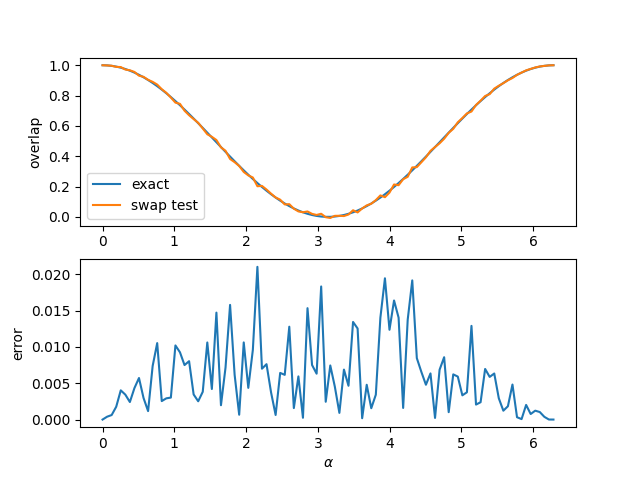

In [8]:
%matplotlib notebook

plt.subplot(211)
plt.plot(alpha_list, o_cl_list, label="exact")
plt.plot(alpha_list, o_qc_list, label="swap test")
plt.legend(loc='best')
plt.ylabel("overlap")
plt.subplot(212)
plt.plot(alpha_list, error_list)
plt.xlabel(r"$\alpha$")
plt.ylabel("error")
plt.show()